# Simulate Non-Convex Rooms with ISM and Ray Tracing
Simulate early reflections using the image source model and late reflections using ray tracing

In [1]:
import pyroomacoustics as pra
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

## Floor Shape and Absorption Material

In [2]:
# pra.materials_data

In [3]:
floor = np.array([[0, 0], [0, 12], [2.5, 7.5], [5, 12], [9, 6], [7, 4], [8, 0]]).T
material = pra.Material('wooden_door')
fs = 16000

## Create non-Convex 2D Floor Plan

<Figure size 432x288 with 0 Axes>

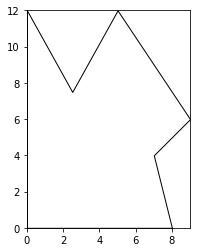

In [4]:
# 2D Room
room = pra.Room.from_corners(
    floor,
    fs=fs,
    materials=material,
    max_order=4,
    ray_tracing=True,
    air_absorption=True
)

plt.figure()
_ = room.plot()

## Create 3D Room

<Figure size 432x288 with 0 Axes>

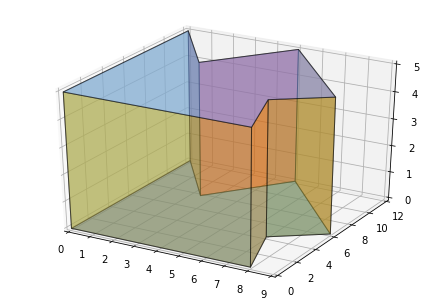

In [5]:
materials_ceil_floors = pra.make_materials(ceiling='ceramic_tiles',floor='carpet_hairy')
height = 5
room.extrude(height, materials=materials_ceil_floors)

plt.figure()
_ = room.plot()

In [6]:
mat = materials_ceil_floors
print('Floor Material:')
print(mat['floor'].energy_absorption)
print('\n')
print('Ceiling Material:')
print(mat['ceiling'].energy_absorption)
print('\n')
print('Wall Material:')
print(material.energy_absorption)

Floor Material:
{'description': 'Hairy carpet on 3 mm felt', 'coeffs': [0.11, 0.14, 0.37, 0.43, 0.27, 0.25, 0.25], 'center_freqs': [125, 250, 500, 1000, 2000, 4000, 8000]}


Ceiling Material:
{'description': 'Ceramic tiles with a smooth surface', 'coeffs': [0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02], 'center_freqs': [125, 250, 500, 1000, 2000, 4000, 8000]}


Wall Material:
{'coeffs': array([0.14, 0.1 , 0.06, 0.08, 0.1 , 0.1 , 0.1 ]), 'center_freqs': array([ 125.,  250.,  500., 1000., 2000., 4000., 8000.])}


## Add Sound Source and Microphone

In [7]:
audio_dir = './audio/'
filename1 = 'Gt_Riff.wav'
filename2 = 'wow.wav'
path1 = audio_dir + filename1
path2 = audio_dir + filename2

audio1, _ = librosa.load(path=path1,sr=fs,mono=True)
audio2, _ = librosa.load(path=path2,sr=fs,mono=True)

Source is inside: True
Mic is inside: True


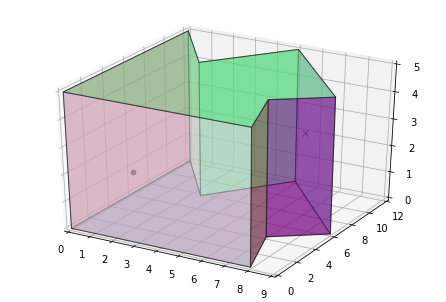

In [8]:
source_location = [2, 2, 2]
mic_location = [7, 8, 3]

print(f'Source is inside: {room.is_inside(source_location)}')
print(f'Mic is inside: {room.is_inside(mic_location)}')

room.add_source(source_location)
room.add_microphone(mic_location)

fig, ax = room.plot(mic_marker_size=40)
_ = ax.set_xlim([0, 9])
_ = ax.set_ylim([0, 12])
_ = ax.set_zlim([0, 5])

## Compute Image Source

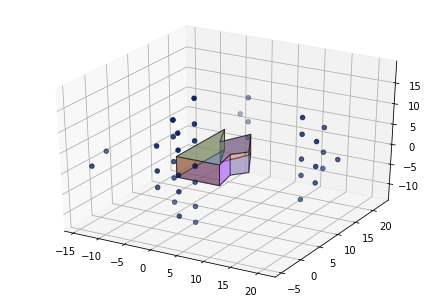

In [9]:
room.image_source_model()

fig, ax = room.plot(img_order=3)

## Room Impluse Response

<Figure size 432x288 with 0 Axes>

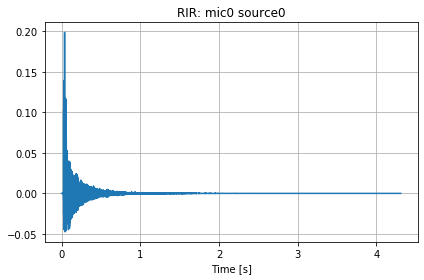

In [10]:
room.set_ray_tracing(receiver_radius=0.5)
room.compute_rir()
rir = room.rir[0][0]

plt.figure()
room.plot_rir()
plt.grid()

## RT60

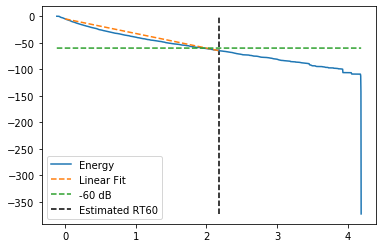

rt60 =  2180.687500 ms


In [11]:
rt60 = pra.experimental.measure_rt60(rir,fs=room.fs,plot=True)
print(f'rt60 = {rt60*1000 : 0f} ms')

## Simulate Room

In [12]:
room.sources[0].signal = audio1
room.simulate()

Original Audio 1:


Simulated Room:


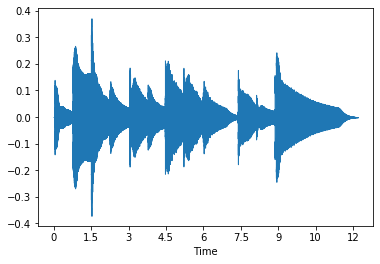

In [13]:
print('Original Audio 1:')
librosa.display.waveshow(audio1,sr=fs)
org = ipd.Audio(audio1,rate=fs)
ipd.display(org)

simulation = room.mic_array.signals[0,:]
print('Simulated Room:')
sim = ipd.Audio(simulation,rate=fs)
ipd.display(sim)

In [14]:
room.sources[0].signal = audio2
room.simulate()

Original Audio 2:


Simulated Room:


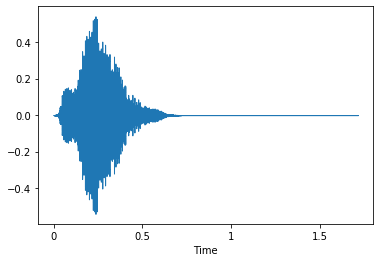

In [15]:
print('Original Audio 2:')
librosa.display.waveshow(audio2,sr=fs)
ipd.Audio(audio2,rate=fs)
ipd.display(org)

simulation = room.mic_array.signals[0,:]
print('Simulated Room:')
sim = ipd.Audio(simulation,rate=fs)
ipd.display(sim)